In [1]:
import re
import csv 
import time
import requests
import numpy as np 
import pandas as pd
import seaborn as sns
from csv import writer
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [2]:
#Get the soup object from specified url
def getSoup(url):
    try:
        source = requests.get(url).text
        soup = BeautifulSoup(source, 'lxml')
        return soup
    except Exception as e:
        print(e)
        pass

In [3]:
'''def getExistingLinks():
    df = pd.DataFrame(columns=['Links'])
    for i in range(1000):
        url = 'https://shop.wegmans.com/shop/categories/' + str(i)
        PATH = 'C:\Program Files (x86)\chromedriver.exe'
        soup = getSoup(url)
        driver = webdriver.Chrome(PATH)
        driver.get(url)
        timeout = 3
        try:
            element_present = EC.presence_of_element_located((By.ID, 'main'))
            WebDriverWait(driver, timeout).until(element_present)
        except TimeoutException:
            print("Timed out waiting for page to load")
        time.sleep(3)
        text = driver.page_source 
        button = driver.find_element_by_id('shopping-selector-shop-context-intent-instore')
        if(driver.current_url != 'https://shop.wegmans.com/404'):
            df = df.append({'Links': driver.current_url}, ignore_index=True)
            print(i, df)
        button.click()
        time.sleep(2)
        driver.close()
    return df'''

'def getExistingLinks():\n    df = pd.DataFrame(columns=[\'Links\'])\n    for i in range(1000):\n        url = \'https://shop.wegmans.com/shop/categories/\' + str(i)\n        PATH = \'C:\\Program Files (x86)\\chromedriver.exe\'\n        soup = getSoup(url)\n        driver = webdriver.Chrome(PATH)\n        driver.get(url)\n        timeout = 3\n        try:\n            element_present = EC.presence_of_element_located((By.ID, \'main\'))\n            WebDriverWait(driver, timeout).until(element_present)\n        except TimeoutException:\n            print("Timed out waiting for page to load")\n        time.sleep(3)\n        text = driver.page_source \n        button = driver.find_element_by_id(\'shopping-selector-shop-context-intent-instore\')\n        if(driver.current_url != \'https://shop.wegmans.com/404\'):\n            df = df.append({\'Links\': driver.current_url}, ignore_index=True)\n            print(i, df)\n        button.click()\n        time.sleep(2)\n        driver.close()\n  

In [4]:
def pagePass(url):
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    driver.get(str(url))
    time.sleep(3)
    button = driver.find_element_by_id('shopping-selector-shop-context-intent-instore')
    button.click()
    return driver

In [5]:
def forLoop(Elements, columnName, propertyName):
    df = pd.DataFrame(columns=[columnName])
    for i in Elements:
        att = i.get_property(propertyName)
        df = df.append({columnName: att}, ignore_index=True)
    return df

In [178]:
def getPageInfo(url):
    #I am opening in another def
    driver = pagePass(str(url))
    
    #Get elements from class on page
    name = driver.find_elements_by_class_name('cell-title-text')
    price = driver.find_elements_by_class_name('css-19m8h51')
    weight = driver.find_elements_by_class_name('cell-product-size')
    pricePerOunce = driver.find_elements_by_class_name('css-cpy6p')
    PPODF = pd.DataFrame(columns=["Price Per Ounce"])

    #Iterate through element above
    nameDF = forLoop(name, 'Name', 'innerHTML')
    priceDF = forLoop(price, 'Price', 'innerHTML')
    weightDF = forLoop(weight, 'Weight', 'innerHTML')
    pricePerPoundDF = forLoop(pricePerOunce, 'Price per pound', 'innerHTML')
    print(len(pricePerPoundDF))
    print(pricePerPoundDF)
    df = pd.DataFrame(columns=['Price per pound'])
    i = 2
    temp = []
    while(i < (len(pricePerPoundDF)-3)):
        i+=3
        print(i)
        print(pricePerPoundDF['Price per pound'].iloc[i])
        df = df.append({'Price per pound': pricePerPoundDF['Price per pound'].iloc[i]}, ignore_index=True)
        
        
    df['Price per pound'] = df['Price per pound'].str.replace('oz.', '').str.replace('fl.', '').str.replace('$', '').str.replace(')', '').str.replace('(', '').str.replace('Price', '').str.replace('', '')
        
    #print(pricePerPoundDF['Price per pound'])     
    #pricePerPoundDF['Price per pound'] = pricePerPoundDF['Price per pound'].replace(r'^\s*$', np.nan, regex=True)
    #hey = pricePerPoundDF[pricePerPoundDF['Price per pound'].str.contains("NaN")==False]
    #hey.reset_index(drop=True, inplace = True)
    
    print('hey df: ', df['Price per pound'])
    
    priceDF['Price'] = priceDF['Price'].str.replace('$', '').str.replace('2 for', '').astype(float)
    weightDF['Weight'] = weightDF['Weight'].str.replace('oz.', '').str.replace('fl.', '').str.replace('ounce', '').str.replace('lb.', '').str.replace('each', '').astype(float)

    #Merge all value tohgeter 
    mergedDF = nameDF.merge(priceDF, left_index=True, right_index=True)
    mergedDF2 = mergedDF.merge(weightDF, left_index=True, right_index=True)
    mergedDF3 = mergedDF2.merge(df, left_index=True, right_index=True)
    
    driver.close()
    return mergedDF3

In [7]:
#pageInfo = getPageInfo('https://shop.wegmans.com/shop/categories/152')
#print(pageInfo)

In [8]:
def getPageLinks(url):
    #Get all the url from the subcategories
    links = []
    driver = pagePass(url)
    storeColumn = driver.find_elements_by_class_name('css-1lptch2')
    for i in storeColumn:
        att = i.get_property('href')
        links.append(att)
    return links

In [9]:
x='hello bitch'
if('bitch' in x):
    print('fuck this')

fuck this


In [10]:
def random():
    #go through the different categories
    url = 'https://shop.wegmans.com/shop/categories/151'
    categoriesNumber = ['151','1','18', '74','49', '508','93','470']
    df = pd.DataFrame()
    try: 
        driver = pagePass(url)
    except:
        driver = webdriver.Chrome(PATH)
        driver.get(url)
    for i in range(7):
        categories = driver.find_element_by_xpath('//*[@id="nav-main-shop-category-' + str(categoriesNumber[i]) + '"]')
        categories.click()
        href = getPageLinks(driver.current_url)
        for j in range(len(href)):
            print(href[j])
            URLString = href[j]
            DF = getPageInfo(URLString)
            df = df.append(DF, ignore_index=True)
            print('df: ', df)
    driver.close()
    return df

In [11]:
bigDF = pd.DataFrame()
bigDF = random()

https://shop.wegmans.com/shop/categories/152
150
    Price per pound
0             Price
1              / ea
2     ($0.50/ounce)
3             Price
4              / ea
..              ...
145            / ea
146   ($0.41/ounce)
147           Price
148            / ea
149   ($0.50/ounce)

[150 rows x 1 columns]
5
 ($0.31/ounce)
8
 ($0.33/ounce)
11
 ($0.21/ounce)
14
 ($0.35/ounce)
17
 ($0.30/ounce)
20
 ($0.29/ounce)
23
 ($0.35/ounce)
26
 ($0.28/ounce)
29
 ($0.30/ounce)
32
 ($0.46/ounce)
35
 ($0.25/ounce)
38
 ($0.45/ounce)
41
 ($0.30/ounce)
44
 ($0.29/ounce)
47
 ($0.58/ounce)
50
 ($0.33/ounce)
53
 ($0.25/ounce)
56
 ($0.38/ounce)
59
 ($0.34/ounce)
62
 ($0.46/ounce)
65
 ($0.26/ounce)
68
 ($0.33/ounce)
71
 ($0.39/ounce)
74
 ($0.25/ounce)
77
 ($0.28/ounce)
80
 ($0.27/ounce)
83
 ($0.22/ounce)
86
 ($0.44/ounce)
89
 ($0.38/ounce)
92
 ($0.33/ounce)
95
 ($0.31/ounce)
98
 ($0.38/ounce)
101
 ($0.43/ounce)
104
 ($0.32/ounce)
107
 ($0.39/ounce)
110
 ($0.25/ounce)
113
 ($0.34/ounce)
116
 ($1.25/ounce)

df:                                                    Name  Price  Weight  \
0                            Wegmans American Baguette   4.00     8.0   
1     Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75    12.0   
2                        Wegmans Organic Sixseed Bread   5.00    15.0   
3                          Wegmans Bread, Pane Italian   3.00    14.0   
4                          Wegmans Garlic Tuscan Bread   4.50    13.0   
..                                                 ...    ...     ...   
104          EURO CLASSIC Brioche, Authentic, Cinnamon   3.19    16.8   
105     Pepperidge Farm Swirl French Toast Swirl Bread   3.79    14.0   
106  Pepperidge Farm Whole Grain Thin Sliced 15 Gra...   3.29    22.0   
107  Pepperidge Farm Bread, Brown Sugar Cinnamon, T...   6.49    16.0   
108                Beefsteak Bread, Hearty Rye, Seeded   5.99    18.0   

    Price per pound  
0        0.31/ounce  
1        0.33/ounce  
2        0.21/ounce  
3        0.35/ounce  
4       

188
    Price per pound
0             Price
1              / ea
2      ($2.50/each)
3             Price
4              / ea
..              ...
183            / ea
184   ($0.88/ounce)
185           Price
186            / ea
187   ($1.26/ounce)

[188 rows x 1 columns]
5
 ($1.25/ounce)
8
 ($0.85/ounce)
11
 ($1.13/ounce)
14
 ($0.63/ounce)
17
 ($0.80/ounce)
20
 ($0.50/ounce)
23
 ($0.83/ounce)
26
 ($1.00/ounce)
29
 ($0.30/ounce)
32
 ($1.50/ounce)
35
 ($0.80/ounce)
38
 ($0.27/ounce)
41
 ($0.80/ounce)
44
 ($0.82/ounce)
47
 ($0.80/ounce)
50
 ($0.89/ounce)
53
 ($0.65/ounce)
56
 ($0.44/ounce)
59
 ($0.71/ounce)
62
 ($0.42/ounce)
65
 ($0.93/ounce)
68
 ($0.27/ounce)
71
 ($1.00/ounce)
74
 ($0.40/ounce)
77
 ($0.73/ounce)
80
 ($0.74/ounce)
83
 ($0.65/ounce)
86
 ($0.58/ounce)
89
Price
92
Price
95
Price
98
Price
101
Price
104
Price
107
Price
110
Price
113
Price
116
Price
119
Price
122
Price
125
Price
128
Price
131
Price
134
Price
137
Price
140
Price
143
Price
146
Price
149
Price
152
Price
155
Price
158


https://shop.wegmans.com/shop/categories/152
150
    Price per pound
0             Price
1              / ea
2     ($0.50/ounce)
3             Price
4              / ea
..              ...
145            / ea
146   ($0.41/ounce)
147           Price
148            / ea
149   ($0.50/ounce)

[150 rows x 1 columns]
5
 ($0.31/ounce)
8
 ($0.33/ounce)
11
 ($0.21/ounce)
14
 ($0.35/ounce)
17
 ($0.30/ounce)
20
 ($0.29/ounce)
23
 ($0.35/ounce)
26
 ($0.28/ounce)
29
 ($0.30/ounce)
32
 ($0.46/ounce)
35
 ($0.25/ounce)
38
 ($0.45/ounce)
41
 ($0.30/ounce)
44
 ($0.29/ounce)
47
 ($0.58/ounce)
50
 ($0.33/ounce)
53
 ($0.25/ounce)
56
 ($0.38/ounce)
59
 ($0.34/ounce)
62
 ($0.46/ounce)
65
 ($0.26/ounce)
68
 ($0.33/ounce)
71
 ($0.39/ounce)
74
 ($0.25/ounce)
77
 ($0.28/ounce)
80
 ($0.27/ounce)
83
 ($0.22/ounce)
86
 ($0.44/ounce)
89
 ($0.38/ounce)
92
 ($0.33/ounce)
95
 ($0.31/ounce)
98
 ($0.38/ounce)
101
 ($0.43/ounce)
104
 ($0.32/ounce)
107
 ($0.39/ounce)
110
 ($0.25/ounce)
113
 ($0.34/ounce)
116
 ($1.25/ounce)

86
   Price per pound
0            Price
1             / ea
2    ($0.56/ounce)
3            Price
4             / ea
..             ...
81           Price
82           / lb.
83           Price
84            / ea
85   ($0.45/ounce)

[86 rows x 1 columns]
5
 ($1.00/ounce)
8
 ($0.55/ounce)
11
 ($0.48/ounce)
14
 ($0.73/ounce)
17
 ($1.00/ounce)
20
 ($0.59/ounce)
23
 ($0.61/ounce)
26
 ($0.67/ounce)
29
 ($0.45/ounce)
32
 ($1.00/ounce)
35
 ($0.48/ounce)
38
 ($0.48/ounce)
41
 ($10.50/each)
44
 ($0.49/ounce)
47
 ($1.25/ounce)
50
 ($0.66/ounce)
53
 ($1.00/ounce)
56
 ($0.48/ounce)
59
 ($1.25/ounce)
62
 ($0.61/ounce)
65
 ($0.63/ounce)
68
 ($0.48/ounce)
71
 ($1.25/ounce)
74
 ($0.38/ounce)
77
 ($0.59/ounce)
80
 ($0.59/ounce)
83
Price
hey df:  0      1.00/ounce
1      0.55/ounce
2      0.48/ounce
3      0.73/ounce
4      1.00/ounce
5      0.59/ounce
6      0.61/ounce
7      0.67/ounce
8      0.45/ounce
9      1.00/ounce
10     0.48/ounce
11     0.48/ounce
12     10.50/each
13     0.49/ounce
14     1.2

df:                                                   Name  Price  Weight  \
0                           Wegmans American Baguette   4.00     8.0   
1    Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75    12.0   
2                       Wegmans Organic Sixseed Bread   5.00    15.0   
3                         Wegmans Bread, Pane Italian   3.00    14.0   
4                         Wegmans Garlic Tuscan Bread   4.50    13.0   
..                                                ...    ...     ...   
704                          Wegmans French Rolls 6pk   4.50    12.0   
705                Pretzilla Buns, Mini, Soft Pretzel   3.49     8.4   
706                             Martin's Hoagie Rolls   3.99    20.0   
707  King's Hawaiian Rolls, Savory Butter, Party Pack   5.99    24.0   
708   Wegmans Organic Rosemary Olive Oil Rolls 6 Pack   4.50    17.0   

    Price per pound  
0        0.31/ounce  
1        0.33/ounce  
2        0.21/ounce  
3        0.35/ounce  
4        0.30/ounce 

df:                                                    Name  Price  Weight  \
0                            Wegmans American Baguette   4.00    8.00   
1     Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75   12.00   
2                        Wegmans Organic Sixseed Bread   5.00   15.00   
3                          Wegmans Bread, Pane Italian   3.00   14.00   
4                          Wegmans Garlic Tuscan Bread   4.50   13.00   
..                                                 ...    ...     ...   
778                     LaClare Cheese, Honey Goat Log   4.99    7.10   
779         Vermont Creamery Cultured Butter, Sea Salt   3.49    7.05   
780            Vermont Creamery Everything Goat Cheese   4.99    8.00   
781  Cypress Grove Humboldt Fog Goat Cheese (Avg. 0...  11.48    8.00   
782                    Wegmans Taleggio (Avg. 0.62lb.)  10.53    8.00   

    Price per pound  
0        0.31/ounce  
1        0.33/ounce  
2        0.21/ounce  
3        0.35/ounce  
4       

df:                                                    Name  Price  Weight  \
0                            Wegmans American Baguette   4.00     8.0   
1     Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75    12.0   
2                        Wegmans Organic Sixseed Bread   5.00    15.0   
3                          Wegmans Bread, Pane Italian   3.00    14.0   
4                          Wegmans Garlic Tuscan Bread   4.50    13.0   
..                                                 ...    ...     ...   
843  Wegmans Italian Classics Parmigiano Reggiano C...  12.50     7.6   
844  Wegmans Italian Classics Pecorino Romano Chees...   5.92     7.6   
845  Wegmans 16-18 Month Aged White Cheddar Cheese-...   8.13     7.6   
846  Wegmans Italian Classics Parmigiano Reggiano C...  10.34     8.0   
847  Wegmans Gruyere Cheese AGed 4-6 Months, Shredd...   5.74     7.6   

    Price per pound  
0        0.31/ounce  
1        0.33/ounce  
2        0.21/ounce  
3        0.35/ounce  
4       

129
    Price per pound
0             Price
1              / ea
2     ($0.28/ounce)
3             Price
4              / ea
..              ...
124            / ea
125   ($0.18/ounce)
126           Price
127            / ea
128   ($0.22/ounce)

[129 rows x 1 columns]
5
 ($1.99/lb.)
8
 ($7.99/lb.)
11
 ($5.99/lb.)
14
 ($1.99/lb.)
17
 ($0.99/lb.)
20
 ($5.29/lb.)
23
 ($8.99/lb.)
26
 ($5.49/lb.)
29
 ($4.79/lb.)
32
 ($5.99/lb.)
35
 ($0.99/lb.)
38
 ($8.99/lb.)
41
 ($3.99/lb.)
44
 ($2.99/lb.)
47
 ($0.99/lb.)
50
 ($2.99/lb.)
53
 ($5.99/lb.)
56
 ($4.29/lb.)
59
 ($4.69/lb.)
62
 ($4.99/lb.)
65
 ($4.49/lb.)
68
 ($1.89/lb.)
71
 ($5.99/lb.)
74
 ($2.99/lb.)
77
 ($2.69/lb.)
80
 ($0.79/lb.)
83
 ($1.99/lb.)
86
 ($2.29/lb.)
89
 ($3.99/lb.)
92
 ($4.99/lb.)
95
 ($0.52/ounce)
98
 ($5.99/lb.)
101
 ($3.99/lb.)
104
 ($0.52/ounce)
107
 ($2.99/lb.)
110
 ($0.18/ounce)
113
 ($0.52/ounce)
116
 ($0.60/ounce)
119
 ($0.33/ounce)
122
 ($0.18/ounce)
125
 ($0.18/ounce)
128
 ($0.22/ounce)
hey df:  0        1.99/lb.
1      

30
   Price per pound
0            Price
1             / ea
2      ($6.09/lb.)
3            Price
4             / ea
5      ($5.59/lb.)
6            Price
7             / ea
8    ($0.44/ounce)
9            Price
10            / ea
11     ($3.15/lb.)
12           Price
13            / ea
14     ($7.29/lb.)
15           Price
16            / ea
17   ($0.59/ounce)
18           Price
19            / ea
20   ($1.37/ounce)
21           Price
22            / ea
23   ($1.12/ounce)
24           Price
25            / ea
26   ($0.69/ounce)
27           Price
28            / ea
29   ($0.78/ounce)
5
 ($5.59/lb.)
8
 ($0.44/ounce)
11
 ($3.15/lb.)
14
 ($7.29/lb.)
17
 ($0.59/ounce)
20
 ($1.37/ounce)
23
 ($1.12/ounce)
26
 ($0.69/ounce)
29
 ($0.78/ounce)
hey df:  0       5.59/lb.
1     0.44/ounce
2       3.15/lb.
3       7.29/lb.
4     0.59/ounce
5     1.37/ounce
6     1.12/ounce
7     0.69/ounce
8     0.78/ounce
Name: Price per pound, dtype: object
df:                                                    

df:                                                    Name  Price  Weight  \
0                            Wegmans American Baguette   4.00     8.0   
1     Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75    12.0   
2                        Wegmans Organic Sixseed Bread   5.00    15.0   
3                          Wegmans Bread, Pane Italian   3.00    14.0   
4                          Wegmans Garlic Tuscan Bread   4.50    13.0   
..                                                 ...    ...     ...   
963  Wegmans Leg of Lamb Butterflied  Boneless (Avg...  16.42     8.0   
964                 Wegmans Lamb Shank (Avg. 1.605lb.)  12.02    12.0   
965                  Maple Leaf Farms Duck, Roast Half  11.99    14.0   
966  Wegmans Boneless Center Cut Pork Chops, FAMILY...   8.00    16.0   
967  Wegmans Pork Tenderloin, 4 pieces, FAMILY PACK...  12.56    16.0   

    Price per pound  
0        0.31/ounce  
1        0.33/ounce  
2        0.21/ounce  
3        0.35/ounce  
4       

14
 ($0.80/ounce)
17
 ($0.64/ounce)
20
 ($0.67/ounce)
23
 ($0.80/ounce)
26
 ($1.40/ounce)
29
 ($0.67/ounce)
32
 ($1.20/ounce)
35
 ($0.75/ounce)
38
 ($0.73/ounce)
41
 ($0.38/ounce)
44
 ($0.44/ounce)
47
 ($0.63/ounce)
50
 ($0.63/ounce)
53
 ($0.67/ounce)
56
 ($1.00/ounce)
59
 ($0.63/ounce)
62
 ($0.85/ounce)
65
 ($0.85/ounce)
68
 ($0.72/ounce)
71
 ($1.20/ounce)
hey df:  0      0.71/ounce
1      0.42/ounce
2      0.50/ounce
3      0.80/ounce
4      0.64/ounce
5      0.67/ounce
6      0.80/ounce
7      1.40/ounce
8      0.67/ounce
9      1.20/ounce
10     0.75/ounce
11     0.73/ounce
12     0.38/ounce
13     0.44/ounce
14     0.63/ounce
15     0.63/ounce
16     0.67/ounce
17     1.00/ounce
18     0.63/ounce
19     0.85/ounce
20     0.85/ounce
21     0.72/ounce
22     1.20/ounce
Name: Price per pound, dtype: object
df:                                                     Name  Price  Weight  \
0                             Wegmans American Baguette   4.00     8.0   
1      Wegmans Organic Sour

112
    Price per pound
0             Price
1              / ea
2     ($0.91/ounce)
3             Price
4              / ea
..              ...
107            / ea
108   ($0.83/ounce)
109           Price
110            / ea
111   ($0.83/ounce)

[112 rows x 1 columns]
5
 ($0.31/ounce)
8
 ($0.90/ounce)
11
 ($0.29/ounce)
14
 ($0.59/ounce)
17
 ($0.67/ounce)
20
 ($0.40/ounce)
23
 ($0.91/ounce)
26
 ($0.73/ounce)
29
 ($0.34/ounce)
32
 ($0.75/ounce)
35
 ($0.41/ounce)
38
 ($0.27/ounce)
41
 ($0.32/ounce)
44
 ($0.27/ounce)
47
Price
50
Price
53
Price
56
Price
59
Price
62
Price
65
Price
68
Price
71
Price
74
Price
77
Price
80
Price
83
Price
86
Price
89
Price
92
Price
95
Price
98
 / ea
101
 / ea
104
 / ea
107
 / ea
110
 / ea
hey df:  0      0.31/ounce
1      0.90/ounce
2      0.29/ounce
3      0.59/ounce
4      0.67/ounce
5      0.40/ounce
6      0.91/ounce
7      0.73/ounce
8      0.34/ounce
9      0.75/ounce
10     0.41/ounce
11     0.27/ounce
12     0.32/ounce
13     0.27/ounce
14               
1

187
    Price per pound
0             Price
1              / ea
2     ($0.83/ounce)
3             Price
4              / ea
..              ...
182            / ea
183   ($1.30/ounce)
184           Price
185            / ea
186   ($1.33/ounce)

[187 rows x 1 columns]
5
 ($0.88/ounce)
8
 ($0.83/ounce)
11
 ($1.20/ounce)
14
 ($1.60/ounce)
17
 ($1.40/ounce)
20
 ($1.50/ounce)
23
 ($1.30/ounce)
26
 ($1.58/ounce)
29
 ($1.43/ounce)
32
 ($1.50/ounce)
35
 ($1.40/ounce)
38
 ($1.60/ounce)
41
 ($1.20/ounce)
44
 ($1.30/ounce)
47
 ($1.20/ounce)
50
 ($1.50/ounce)
53
 ($1.20/ounce)
56
 ($1.62/ounce)
59
 ($1.12/ounce)
62
 ($1.50/ounce)
65
 ($1.05/ounce)
68
 ($1.27/ounce)
71
 ($1.50/ounce)
74
 ($1.43/ounce)
77
 ($1.10/ounce)
80
 ($0.93/ounce)
83
 ($1.75/ounce)
86
 ($1.00/ounce)
89
 ($1.00/ounce)
92
 ($2.00/ounce)
95
 ($1.13/ounce)
98
 ($1.00/ounce)
101
 ($0.80/ounce)
104
 ($2.00/ounce)
107
 ($1.08/ounce)
110
 ($1.50/ounce)
113
 ($1.60/ounce)
116
 ($0.47/ounce)
119
 ($2.28/ounce)
122
 ($1.30/ounce)
125
 (

df:                                                     Name  Price  Weight  \
0                             Wegmans American Baguette   4.00    8.00   
1      Wegmans Organic Sourdough Miche Bread, Half Loaf   3.75   12.00   
2                         Wegmans Organic Sixseed Bread   5.00   15.00   
3                           Wegmans Bread, Pane Italian   3.00   14.00   
4                           Wegmans Garlic Tuscan Bread   4.50   13.00   
...                                                 ...    ...     ...   
1337  Wegmans Seafood Truffle Risotto, Oven Safe (Av...  12.99   16.00   
1338                                    Wegmans Grouper   8.35   32.00   
1339    Wegmans Shrimp Scampi, Oven Safe (Avg. 0.58lb.)   8.05   16.00   
1340  Wegmans Mediterranean Cod, Oven Safe (Avg. 0.5...  10.99   12.00   
1341                             Wegmans Seafood Medley  64.99    2.75   

     Price per pound  
0         0.31/ounce  
1         0.33/ounce  
2         0.21/ounce  
3         0.35

155
    Price per pound
0             Price
1              / ea
2      ($12.99/lb.)
3             Price
4              / ea
..              ...
150            / ea
151   ($10.00/each)
152           Price
153            / ea
154   ($59.99/each)

[155 rows x 1 columns]
5
 ($12.99/lb.)
8
 ($9.99/lb.)
11
 ($9.99/lb.)
14
 ($7.99/lb.)
17
 ($1.00/ounce)
20
 ($22.99/lb.)
23
Price
26
Price
29
$7.00
32
 ($0.16/ounce)
35
 ($12.99/lb.)
38
 ($16.99/lb.)
41
 ($12.49/lb.)
44
 ($29.99/lb.)
47
 ($16.99/lb.)
50
 ($5.49/lb.)
53
 ($25.99/lb.)
56
Price
59
Price
62
Price
65
Price
68
Price
71
Price
74
Price
77
Price
80
Price
83
Price
86
 / ea
89
 / ea
92
 / ea
95
 / ea
98
 / ea
101
 / ea
104
 / ea
107
 / ea
110
 / ea
113
 / ea
116
 / lb.
119
 ($1.50/each)
122
 ($0.62/ounce)
125
Price
128
Price
131
Price
134
Price
137
Price
140
Price
143
Price
146
Price
149
Price
152
Price
hey df:  0       12.99/lb.
1        9.99/lb.
2        9.99/lb.
3        7.99/lb.
4      1.00/ounce
5       22.99/lb.
6                
7  

95
   Price per pound
0            Price
1             / ea
2    ($2.75/ounce)
3            Price
4             / ea
..             ...
90            / ea
91    ($16.99/lb.)
92           Price
93            / ea
94   ($1.84/ounce)

[95 rows x 1 columns]
5
 ($49.99/lb.)
8
 ($2.75/ounce)
11
 ($0.25/ounce)
14
 ($2.25/ounce)
17
 ($0.27/ounce)
20
 ($1.67/ounce)
23
 ($0.29/fl. oz.)
26
 ($2.50/ounce)
29
 ($2.25/ounce)
32
 ($0.19/ounce)
35
 ($0.25/ounce)
38
 ($1.67/ounce)
41
 ($0.62/ounce)
44
Price
47
Price
50
Price
53
Price
56
Price
59
Price
62
Price
65
Price
68
Price
71
Price
74
Price
77
Price
80
Price
83
Price
86
Price
89
Price
92
Price
hey df:  0       49.99/lb.
1      2.75/ounce
2      0.25/ounce
3      2.25/ounce
4      0.27/ounce
5      1.67/ounce
6          0.29/ 
7      2.50/ounce
8      2.25/ounce
9      0.19/ounce
10     0.25/ounce
11     1.67/ounce
12     0.62/ounce
13               
14               
15               
16               
17               
18               
19       

In [12]:

bigDF

,Name,Price,Weight,Price per pound
0,Wegmans American Baguette,4.00,8.00,0.31/ounce
1,"Wegmans Organic Sourdough Miche Bread, Half Loaf",3.75,12.00,0.33/ounce
2,Wegmans Organic Sixseed Bread,5.00,15.00,0.21/ounce
3,"Wegmans Bread, Pane Italian",3.00,14.00,0.35/ounce
4,Wegmans Garlic Tuscan Bread,4.50,13.00,0.30/ounce
...,...,...,...,...
1543,"Spence &amp; Co. Pinwheels, Smoked Salmon",8.99,6.00,
1544,"Ducktrap Spruce Point Salmon, Smoked Atlantic,...",9.99,1.00,
1545,Wegmans Teriyaki Simmer Sauce,2.49,5.00,
1546,Wegmans Lobster Dip (Avg. 0.5lb.),8.00,7.00,


In [48]:
bigDF.describe()

,Price,Weight
count,1548.000000,1548.000000
mean,8.224580,13.994948
std,6.687394,10.064268
min,0.650000,1.000000
25%,3.790000,7.000000
50%,6.000000,12.000000
75%,10.000000,16.000000
max,64.990000,93.000000


In [52]:
dam = bigDF.apply(lambda x: any(x.values == ""), axis=1).value_counts()
dam

False    1330
True      218
dtype: int64

In [72]:
bigDF['length'] = bigDF['Name'].apply(len)
bigDF.head()

,Name,Price,Weight,Price per pound,length
0,Wegmans American Baguette,4.00,8.0,0.31/ounce,25
1,"Wegmans Organic Sourdough Miche Bread, Half Loaf",3.75,12.0,0.33/ounce,48
2,Wegmans Organic Sixseed Bread,5.00,15.0,0.21/ounce,29
3,"Wegmans Bread, Pane Italian",3.00,14.0,0.35/ounce,27
4,Wegmans Garlic Tuscan Bread,4.50,13.0,0.30/ounce,27


In [107]:
dfOunce = pd.DataFrame()
dfOunce = bigDF[bigDF['Price per pound'].str.contains('ounce')]
dfOunce['Price per pound'] = dfOunce['Price per pound'].str.replace(r'/ounce', '')
dfOunce

<ipython-input-107-d7d3fcb0df51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOunce['Price per pound'] = dfOunce['Price per pound'].str.replace(r'/ounce', '')


,Name,Price,Weight,Price per pound,length
0,Wegmans American Baguette,4.00,8.0,0.31,25
1,"Wegmans Organic Sourdough Miche Bread, Half Loaf",3.75,12.0,0.33,48
2,Wegmans Organic Sixseed Bread,5.00,15.0,0.21,29
3,"Wegmans Bread, Pane Italian",3.00,14.0,0.35,27
4,Wegmans Garlic Tuscan Bread,4.50,13.0,0.30,27
...,...,...,...,...,...
1530,Wegmans Smoked Alaskan Sockeye Salmon,9.99,4.0,2.25,37
1531,Wegmans Smoked Scottish Style Salmon,8.99,17.0,0.19,36
1532,Wegmans Zesty Cocktail Sauce,3.29,9.0,0.25,28
1533,Wegmans Medium Cocktail Sauce,2.29,12.0,1.67,29


In [100]:
dfLb = pd.DataFrame()
dfLb = bigDF[bigDF['Price per pound'].str.contains('lb')]
dfLb['Price per pound'] = dfLb['Price per pound'].str.replace(r'/lb.', '').str.replace(r'/ lb.', '')
dfLb = dfLb[dfLb['Price per pound'] != " "]
dfLb['Price per pound'] = dfLb['Price per pound'].astype(float)
dfLb['Price per pound'] = dfLb['Price per pound']/12
dfLb

<ipython-input-100-c425574dbdbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLb['Price per pound'] = dfLb['Price per pound'].str.replace(r'/lb.', '').str.replace(r'/ lb.', '')


,Name,Price,Weight,Price per pound,length
750,Wegmans Traditional Blue Stilton Cheese (Avg. ...,10.12,5.0,1.124167,54
752,"Wegmans Cheese, Brie, Got Your Goat",9.99,7.0,1.790833,35
753,Wegmans Come Ash You are (Avg. 0.46lb.),9.89,8.0,1.415833,39
757,Wegmans Fresh Crumbled Goat Cheese,4.99,8.0,1.415833,34
758,"Wegmans Cave-Ripened Medium Brie Cheese, Butte...",10.53,8.0,1.665833,63
...,...,...,...,...,...
1485,Wegmans Ready to Cook Salmon Burgers (Avg. 0.8...,8.79,7.0,0.790833,50
1504,Wegmans Ready to Cook Cajun Salmon and Garlic ...,12.00,1.0,1.749167,58
1517,Wegmans Seasoned Lobster Tail,13.00,8.0,1.415833,29
1518,"Wegmans Mushrooms, Lobster Stuffed (Avg. 1lb.)",16.99,8.0,1.415833,46


In [181]:
finalDf = dfLb.append(dfOunce)
finalDf['Price per pound'] = finalDf['Price per pound'].astype(float)
finalDf

,Name,Price,Weight,Price per pound,length
750,Wegmans Traditional Blue Stilton Cheese (Avg. ...,10.12,5.0,1.124167,54
752,"Wegmans Cheese, Brie, Got Your Goat",9.99,7.0,1.790833,35
753,Wegmans Come Ash You are (Avg. 0.46lb.),9.89,8.0,1.415833,39
757,Wegmans Fresh Crumbled Goat Cheese,4.99,8.0,1.415833,34
758,"Wegmans Cave-Ripened Medium Brie Cheese, Butte...",10.53,8.0,1.665833,63
...,...,...,...,...,...
1530,Wegmans Smoked Alaskan Sockeye Salmon,9.99,4.0,2.250000,37
1531,Wegmans Smoked Scottish Style Salmon,8.99,17.0,0.190000,36
1532,Wegmans Zesty Cocktail Sauce,3.29,9.0,0.250000,28
1533,Wegmans Medium Cocktail Sauce,2.29,12.0,1.670000,29


In [183]:
finalDf.rename(columns={"Price per pound": "Price per ounce"}, inplace =True)

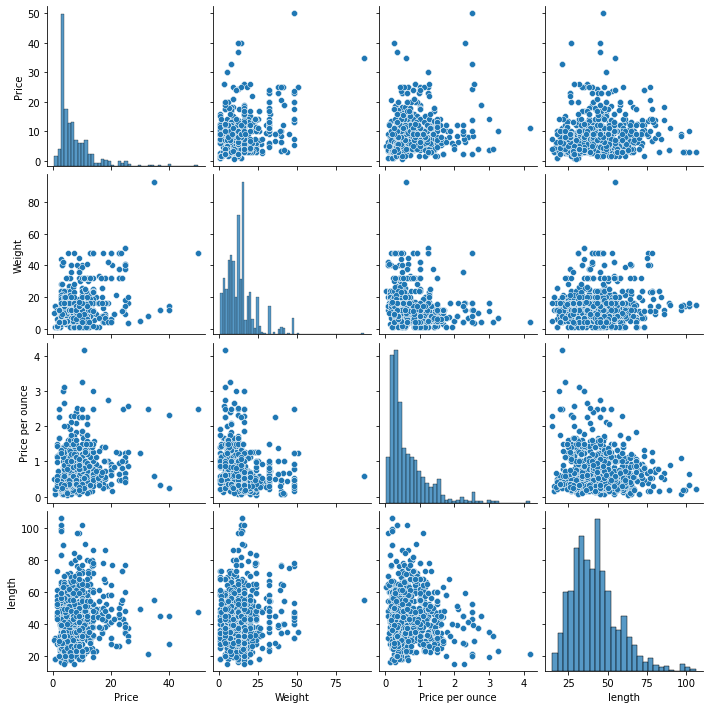

In [184]:
sns.pairplot(finalDf)

In [185]:
finalDf['Price per ounce'].describe()

count    1127.000000
mean        0.661944
std         0.572278
min         0.040000
25%         0.270000
50%         0.440000
75%         0.860000
max         4.165833
Name: Price per ounce, dtype: float64

In [186]:
lowHalf = finalDf[finalDf['Price per ounce'] < 0.440000]
highHalf = finalDf[finalDf['Price per ounce'] > 0.440000]
len(lowHalf)
len(highHalf)

563

C:\Users\Maxime Martin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maxime Martin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

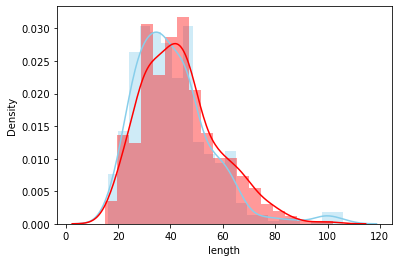

In [187]:

sns.distplot( lowHalf['length'] , color="skyblue", label="length")
sns.distplot( highHalf['length'] , color="red", label="length")


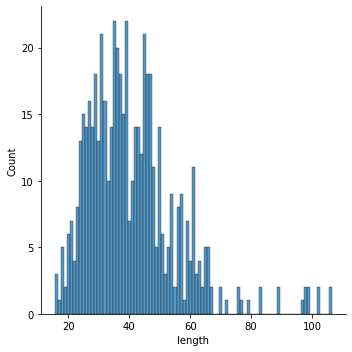

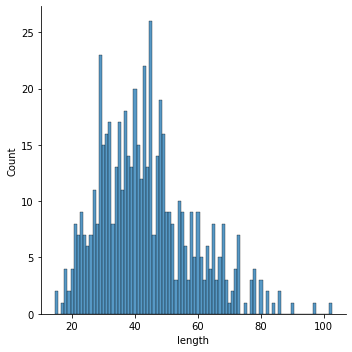

In [188]:
sns.displot(lowHalf, x="length", discrete=True)
sns.displot(highHalf, x="length", discrete=True)


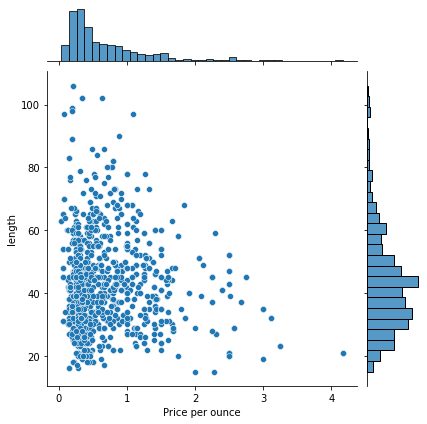

In [190]:
sns.jointplot(y='length',x='Price per ounce',data=finalDf,kind='scatter')

<AxesSubplot:>

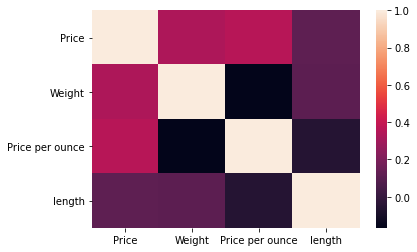

In [191]:
sns.heatmap(finalDf.corr())